#FEATURE ENGINEERING

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('/Users/darshdave/Documents/Projects/TitanicML-Predicting-Survival/notebooks/data/train.csv')
test_df = pd.read_csv('/Users/darshdave/Documents/Projects/TitanicML-Predicting-Survival/notebooks/data/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for datapoint in data:
  datapoint['Sex'] = datapoint['Sex'].map(genders)

In [5]:
train_df.Sex.unique()

array([0, 1])

In [6]:
embark = {"S":0, "C":1, "Q":2}
data = [train_df, test_df]

for datapoint in data:
  datapoint['Embarked'] = datapoint['Embarked'].map(embark)

In [7]:
train_df.Embarked.unique()

array([ 0.,  1.,  2., nan])

In [8]:
train_df.shape

(891, 12)

In [9]:
train_df[~train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [10]:
train_df = train_df[~train_df['Embarked'].isna()]

In [11]:
train_df.Embarked.unique()

array([0., 1., 2.])

In [12]:
train_df.loc[:, 'Fare'] = train_df['Fare'].astype(int)
test_df.loc[:, 'Fare'] = test_df['Fare'].fillna(0)
test_df.loc[:, 'Fare'] = test_df['Fare'].astype(int)

In [16]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.0,NaN,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0,NaN,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.0,NaN,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.0,NaN,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7.0,NaN,1.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.0,NaN,0.0
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9.0,NaN,0.0
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7.0,NaN,0.0


In [17]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)

/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/1304624017.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/1304624017.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment u

In [18]:
data_train_test = pd.concat([train_df.assign(ind="train"), test_df.assign(ind="test")], ignore_index=True)
age_nan_pos = data_train_test[data_train_test["Age"].isnull()].index

In [19]:
for i in age_nan_pos:
    mean_age = data_train_test["Age"][((data_train_test["Title"] == data_train_test.iloc[i]["Title"]))].mean()
    data_train_test["Age"].iloc[i] = mean_age

/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/3918508214.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_train_test["Age"].iloc[i] = mean_age
/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/391850

In [20]:
test_df, train_df = data_train_test[data_train_test["ind"].eq("test")], data_train_test[data_train_test["ind"].eq("train")]

In [21]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ind,Name


In [22]:
data = [train_df, test_df]
for datpoint in data:
    datpoint['Age'] = datpoint['Age'].astype(int)
    datpoint.loc[ datpoint['Age'] <= 15, 'Age'] = 0
    datpoint.loc[(datpoint['Age'] > 15) & (datpoint['Age'] <= 30), 'Age'] = 1
    datpoint.loc[(datpoint['Age'] > 30) & (datpoint['Age'] <= 45), 'Age'] = 2
    datpoint.loc[(datpoint['Age'] > 45) & (datpoint['Age'] <= 60), 'Age'] = 3
    datpoint.loc[ datpoint['Age'] > 60, 'Age'] = 4

/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/957655885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datpoint['Age'] = datpoint['Age'].astype(int)
/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/957655885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datpoint['Age'] = datpoint['Age'].astype(int)


In [23]:
train_df.Age.unique()

array([1, 2, 3, 0, 4])

In [24]:
train_df.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)
test_df.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)

/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/3255720781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)
/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/3255720781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(labels=["Ticket","Cabin", "ind"], axis=1, inplace = True)


In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name
0,1,0.0,3,0,1,1,0,7.0,0.0,1.0,NaN
1,2,1.0,1,1,2,1,0,71.0,1.0,3.0,NaN
2,3,1.0,3,1,1,0,0,7.0,0.0,2.0,NaN
3,4,1.0,1,1,2,1,0,53.0,0.0,3.0,NaN
4,5,0.0,3,0,2,0,0,8.0,0.0,1.0,NaN


In [26]:
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name
889,892,NaN,3,0,2,0,0,7.0,2.0,1.0,"Kelly, Mr. James"
890,893,NaN,3,1,3,1,0,7.0,0.0,3.0,"Wilkes, Mrs. James (Ellen Needs)"
891,894,NaN,2,0,4,0,0,9.0,2.0,1.0,"Myles, Mr. Thomas Francis"
892,895,NaN,3,0,1,0,0,8.0,0.0,1.0,"Wirz, Mr. Albert"
893,896,NaN,3,1,1,1,1,12.0,0.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


In [27]:
data = [train_df, test_df]
for datapoint in data:
    datapoint['FamilySize'] = datapoint['SibSp'] + datapoint['Parch'] + 1

/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/119523194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoint['FamilySize'] = datapoint['SibSp'] + datapoint['Parch'] + 1
/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/119523194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoint['FamilySize'] = datapoint['SibSp'] + datapoint['Parch'] + 1


In [28]:
train_df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index = False).agg(['count','sum', 'mean'])

FamilySize Survived                 
                count    sum      mean
0          1      535  161.0  0.300935
1          2      161   89.0  0.552795
2          3      102   59.0  0.578431
3          4       29   21.0  0.724138
4          5       15    3.0  0.200000
5          6       22    3.0  0.136364
6          7       12    4.0  0.333333
7          8        6    0.0  0.000000
8         11        7    0.0  0.000000

In [29]:
data = [train_df, test_df]
for datapoint in data:
    datapoint['Age*Fare'] = datapoint.Age * datapoint.Fare

/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/205869747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoint['Age*Fare'] = datapoint.Age * datapoint.Fare
/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/205869747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoint['Age*Fare'] = datapoint.Age * datapoint.Fare


In [30]:
train_df.loc[:, ['Age*Fare', 'Age', 'Fare']].head(10)

,Age*Fare,Age,Fare
0,7.0,1,7.0
1,142.0,2,71.0
2,7.0,1,7.0
3,106.0,2,53.0
4,16.0,2,8.0
5,16.0,2,8.0
6,153.0,3,51.0
7,0.0,0,21.0
8,11.0,1,11.0
9,0.0,0,30.0


In [33]:
data = [train_df, test_df]
for datapoint in data:
    datapoint['Fare'] = pd.cut(datapoint['Fare'], bins=13, labels=np.arange(13) + 1)

/var/folders/vg/t_12svrj5hgb288wgyshxpd40000gn/T/ipykernel_49636/815305261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoint['Fare'] = pd.cut(datapoint['Fare'], bins=13, labels=np.arange(13) + 1)


In [34]:
test_df.Survived.unique()

array([nan])

##MODEL PREPARATION

In [40]:
!pip install scikit-learn
!pip install catboost
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl (1.9 MB)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [54]:
X_train = train_df.drop(columns=['PassengerId', 'Survived', 'Name'])
X_test = test_df.drop(columns=['PassengerId', 'Survived', 'Name'])
y_train = train_df['Survived']

X_train, X_val, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [55]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [56]:
X_train['Fare'] = X_train['Fare'].astype(float)

In [58]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)

    # Evaluate Train dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('='*35)
    print('\n')

    model_list.append(model_name)
    r2_list.append(model_train_r2)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3686
- Mean Absolute Error: 0.2834
- R2 Score: 0.4275


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4775
- Mean Absolute Error: 0.4590
- R2 Score: 0.0394


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3686
- Mean Absolute Error: 0.2838
- R2 Score: 0.4275


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3637
- Mean Absolute Error: 0.2664
- R2 Score: 0.4425


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2279
- Mean Absolute Error: 0.1039
- R2 Score: 0.7811


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2459
- Mean Absolute Error: 0.1435
- R2 Score: 0.7451


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.2289
- Mean Absolute Error: 0.1131
- R2 Score: 0.7792


CatBoosting Regressor
Model performance for Training set


In [59]:
model_names = []
train_rmse = []
train_mae = []
train_r2 = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)

    mae, rmse, r2 = evaluate_model(y_train, y_train_pred)

    model_names.append(model_name)
    train_rmse.append(rmse)
    train_mae.append(mae)
    train_r2.append(r2)

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Train RMSE': train_rmse,
    'Train MAE': train_mae,
    'Train R2': train_r2
})

print(metrics_df)


                     Model  Train RMSE  Train MAE  Train R2
0        Linear Regression    0.368596   0.283360  0.427509
1                    Lasso    0.477470   0.458989  0.039360
2                    Ridge    0.368598   0.283770  0.427500
3    K-Neighbors Regressor    0.363748   0.266366  0.442469
4            Decision Tree    0.227923   0.103897  0.781101
5  Random Forest Regressor    0.246687   0.144344  0.743575
6             XGBRegressor    0.228887   0.113106  0.779245
7    CatBoosting Regressor    0.257526   0.162742  0.720547
8       AdaBoost Regressor    0.345494   0.276927  0.497021


# Find Best Model

In [60]:
best_model_index = metrics_df['Train R2'].idxmax()

best_model_name = metrics_df.loc[best_model_index, 'Model']

best_model_rmse = metrics_df.loc[best_model_index, 'Train RMSE']
best_model_mae = metrics_df.loc[best_model_index, 'Train MAE']
best_model_r2 = metrics_df.loc[best_model_index, 'Train R2']

print("Best Model:")
print("Model:", best_model_name)
print("Train RMSE:", best_model_rmse)
print("Train MAE:", best_model_mae)
print("Train R2:", best_model_r2)

Best Model:
Model: Decision Tree
Train RMSE: 0.22792257353455098
Train MAE: 0.1038973990532256
Train R2: 0.7811012562013009


# HyperParameter Tunning

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [62]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor()

# Perform random search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the training set
y_train_pred = best_model.predict(X_train)

# Evaluate the best model
best_model_mae, best_model_rmse, best_model_r2 = evaluate_model(y_train, y_train_pred)

print("Best Model Performance:")
print("- Train RMSE: {:.4f}".format(best_model_rmse))
print("- Train MAE: {:.4f}".format(best_model_mae))
print("- Train R2 Score: {:.4f}".format(best_model_r2))

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Best Model Performance:
- Train RMSE: 0.2995
- Train MAE: 0.1994
- Train R2 Score: 0.6220


# CREATE BEST MODEL

In [63]:
from sklearn.ensemble import RandomForestRegressor

best_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 4
}

best_model = RandomForestRegressor(**best_params)

best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)

best_model_mae, best_model_rmse, best_model_r2 = evaluate_model(y_train, y_train_pred)

print("Best Model Performance:")
print("- Train RMSE: {:.4f}".format(best_model_rmse))
print("- Train MAE: {:.4f}".format(best_model_mae))
print("- Train R2 Score: {:.4f}".format(best_model_r2))

Best Model Performance:
- Train RMSE: 0.3002
- Train MAE: 0.2001
- Train R2 Score: 0.6202


# FEATURE IMPORTANCE

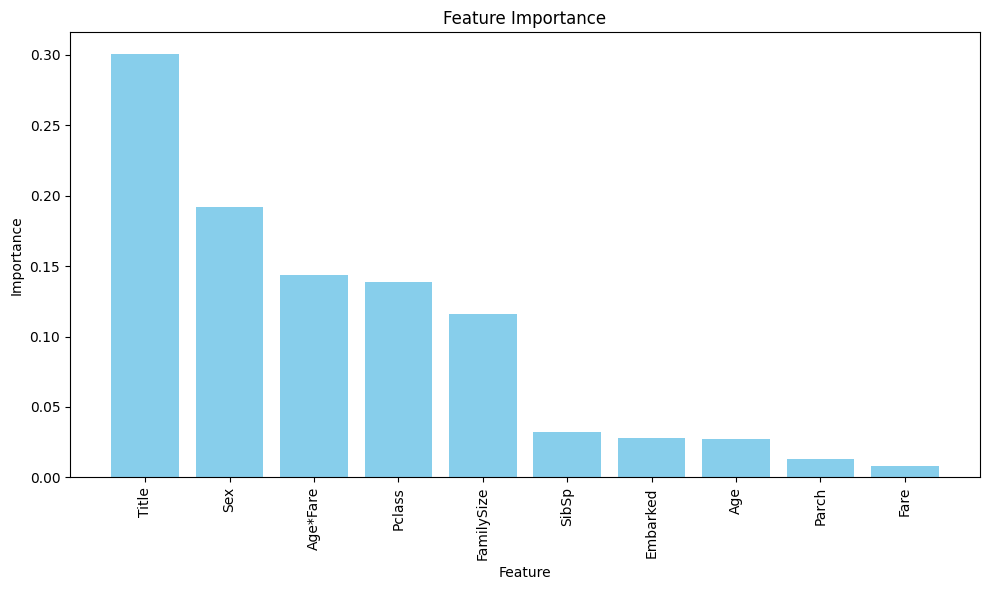

In [65]:
feature_importances = best_model.feature_importances_

feature_names = X_train.columns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color='skyblue')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# FINDING SHAP VALUE

In [67]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.1/452.1 kB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 29.0 MB/s eta 0:00:0000:0100:01


/Users/darshdave/Documents/Projects/TitanicML-Predicting-Survival/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


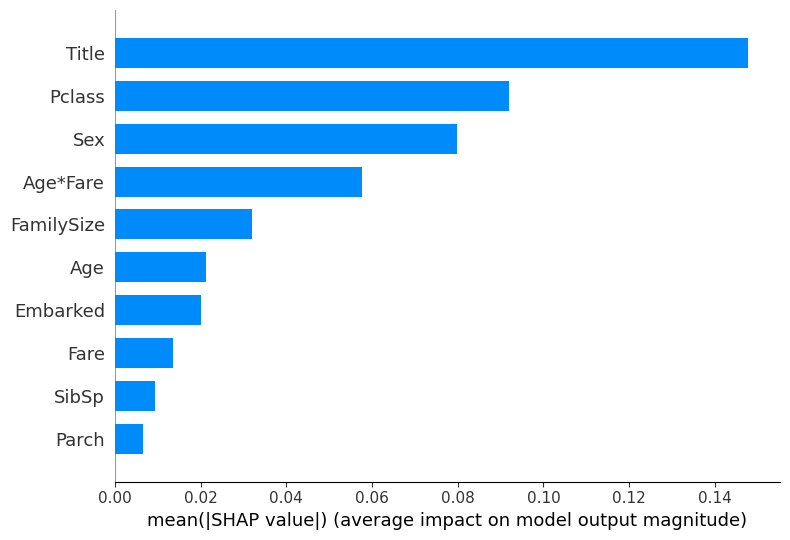

In [68]:
import shap

explainer = shap.Explainer(best_model, X_train)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar', show=False)
plt.show()

# SAVE

In [70]:
import joblib

In [71]:
joblib.dump(best_model, "/Users/darshdave/Documents/Projects/TitanicML-Predicting-Survival/artifacts/best_model.pkl")

['/Users/darshdave/Documents/Projects/TitanicML-Predicting-Survival/artifacts/best_model.pkl']

In [72]:
np.save("/Users/darshdave/Documents/Projects/TitanicML-Predicting-Survival/artifacts/feature_names.npy", X_train.columns)